In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit


In [93]:
# download file: 

import requests


url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls'
r = requests.get(url, allow_redirects=True)

open('COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls', 'wb').write(r.content)


url = 'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx'
r = requests.get(url, allow_redirects=True)

open('COVID-19-geographic-disbtribution-worldwide-today.xls', 'wb').write(r.content)

 

300167

# read data

In [94]:
#df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-03-18.xls")
df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-today.xls")
df

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
0,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-23,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-22,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
6926,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
6927,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
6928,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
6929,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


# explore data

In [95]:
df.groupby("Countries and territories")["Cases"].sum()

Countries and territories
Afghanistan     75
Albania        146
Algeria        264
Andorra        188
Angola           2
              ... 
Uzbekistan      65
Venezuela      106
Vietnam        148
Zambia          12
Zimbabwe         3
Name: Cases, Length: 193, dtype: int64

In [96]:
df[df["Countries and territories"]=="United_States_of_America"]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
6709,2020-03-26,26,3,2020,13963,249,United_States_of_America,US,USA,327167434.0
6710,2020-03-25,25,3,2020,8789,211,United_States_of_America,US,USA,327167434.0
6711,2020-03-24,24,3,2020,11236,119,United_States_of_America,US,USA,327167434.0
6712,2020-03-23,23,3,2020,8459,131,United_States_of_America,US,USA,327167434.0
6713,2020-03-22,22,3,2020,7123,80,United_States_of_America,US,USA,327167434.0
...,...,...,...,...,...,...,...,...,...,...
6791,2020-01-04,4,1,2020,0,0,United_States_of_America,US,USA,327167434.0
6792,2020-01-03,3,1,2020,0,0,United_States_of_America,US,USA,327167434.0
6793,2020-01-02,2,1,2020,0,0,United_States_of_America,US,USA,327167434.0
6794,2020-01-01,1,1,2020,0,0,United_States_of_America,US,USA,327167434.0


In [97]:
df[df["DateRep"]=="2020-03-18"].sort_values(by=['Cases'], ascending=False)[:50]

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
3377,2020-03-18,18,3,2020,3526,347,Italy,IT,ITA,6.043128e+07
5928,2020-03-18,18,3,2020,1987,182,Spain,ES,ESP,4.672375e+07
6717,2020-03-18,18,3,2020,1766,23,United_States_of_America,US,USA,3.271674e+08
3030,2020-03-18,18,3,2020,1178,135,Iran,IR,IRN,8.180027e+07
2470,2020-03-18,18,3,2020,1144,0,Germany,DE,DEU,8.292792e+07
2269,2020-03-18,18,3,2020,1097,27,France,FR,FRA,6.698724e+07
6200,2020-03-18,18,3,2020,450,5,Switzerland,CH,CHE,8.516543e+06
6620,2020-03-18,18,3,2020,407,5,United_Kingdom,UK,GBR,6.648899e+07
400,2020-03-18,18,3,2020,316,0,Austria,AT,AUT,8.847037e+06
4459,2020-03-18,18,3,2020,292,0,Netherlands,NL,NLD,1.723102e+07


# visual explore

In [98]:
# logistic function
from scipy.stats import logistic

def logistic_dNdt(t, norm, tpeak, width):
    return logistic.pdf(t, tpeak, width) * norm


# exponential 

def exp(t, norm, t0, trise):
    return norm*np.exp((t-t0)/trise)


import scipy

def chisq(y_vals, y_expected, y_errs, num_params=1):
    #returns chi2, dof, red_chi2
    #  for reduced chisq test, under the assumption of Poisson counting
    #  we have lnL = const - (1/2.)*chi2
    if y_vals.shape[0] != y_expected.shape[0]:
        print("Inconsistent input sizes")
        return
    #z = (y_vals[i] - y_expected[i]) / y_errs[i]    
    z = (y_vals - y_expected) / y_errs
    chi2 = np.sum(z ** 2)
    chi2dof = chi2 / (y_vals.shape[0] - num_params)
    return chi2, (y_vals.shape[0] - num_params), chi2dof


def fit_factory_boundMC(model, x, y, dy=None, p0=[1.2e-11, -3.6], Nsim=500, plotEs=None):
    if dy is not None:
        paramsPLlog, covariacesPLlog = curve_fit(model, x,
                                           y, p0=p0,
                                           sigma=dy, 
                                             absolute_sigma=True) #approx abs
    else:
        paramsPLlog, covariacesPLlog = curve_fit(model, x,
                                           y, p0=p0)
        
    for i in range(len(p0)):
        print("best-fit param %d = %.4g +/- %.4g" % (i, paramsPLlog[i], np.sqrt(abs(covariacesPLlog[i,i]))))

    
    # Use some MC
    #print(type(x), x)
    #print(float(x[0]), float(x[-1]))
    if plotEs is not None: 
        x_values = plotEs
    else:
        x_values = np.logspace(np.log10(float(x[0])), np.log10(float(x[-1])), 100)
    rng = np.random.RandomState(seed=76)
    parameter_samples = rng.multivariate_normal(paramsPLlog, covariacesPLlog, Nsim)
    #print(paramsPLlog, covariacesPLlog)
    
    #print(parameter_samples.shape)
    realizations = np.array([model(x_values, *pars) for pars in parameter_samples])

    qlo = 100 * scipy.stats.norm.cdf(-1)    #1 is the 1 sigma
    y_low = np.percentile(realizations, qlo, axis=0)
    qhi = 100 * scipy.stats.norm.cdf(1)     #1 is the 1 sigma
    y_high = np.percentile(realizations, qhi, axis=0)
    
    #print(y_low.shape)
    
    return paramsPLlog, np.diag(covariacesPLlog)**0.5, x_values, y_low, y_high





Text(0, 0.5, 'Daily New Cases')

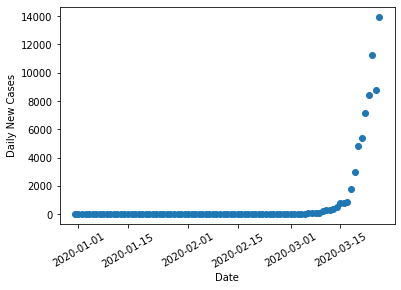

In [99]:
dfus = df[df["Countries and territories"]=="United_States_of_America"]

fig, ax = plt.subplots()

#plot
plt.plot(dfus["DateRep"], dfus["Cases"], marker="o", ls="")


#set tick labels
plt.xticks(rotation=30)

#set axis labels
plt.xlabel("Date")
plt.ylabel("Daily New Cases")


In [121]:
def check_country(country="China", model=logistic_dNdt, p0=[4000, 35, 5], 
                  blind=0, out_string="COVID_Mar26", 
                  ylog=False, ylim_new=None, ylim_cum=None):
    dfch = df[df["Countries and territories"]==country]

    t0ch = dfch["DateRep"].min()

    ts_rel_ch = ((dfch["DateRep"]-t0ch)/ np.timedelta64(1, 'D')).values[::-1]
    nums = dfch["Cases"].values[::-1]
    plot_ts = np.arange(0,np.max(ts_rel_ch)+10, 1.0)
    
    if blind > 0: 
        print("Blinding the last {} days".format(blind))
        ts_blind = ts_rel_ch[-blind:]
        nums_blind = nums[-blind:]
        ts_rel_ch = ts_rel_ch[:-blind]
        nums = nums[:-blind]
        print(ts_blind, nums_blind)
        plt.plot(ts_blind, nums_blind, marker="o", ls="", color='r')        

    plt.plot(ts_rel_ch, nums, marker="o", ls="")

    #fit
    ps_, dps_, ts_, ylo_, yhi_ = fit_factory_boundMC(model, 
                                                          ts_rel_ch, 
                                                           nums,  
                                                           p0=p0, 
                                                            plotEs=plot_ts)
    model_ = model(plot_ts, *ps_) 
    plt.plot(plot_ts, model_, color="gray", ls='--')
    plt.fill_between(ts_,ylo_, yhi_,alpha=0.3,color="gray")
    


    if ylog:
        plt.yscale('log')
    if ylim_new is not None: 
        plt.ylim(ylim_new)
        
    #set axis labels
    plt.xlabel("Day since 2019-12-31")
    plt.ylabel("Daily New Cases")

    plt.tight_layout()
    #save plot
    plt.savefig("{}_{}_dailynew.png".format(country, out_string))
    
    #
    plt.figure()
    cumch = np.cumsum(nums)
    plt.plot(ts_rel_ch, cumch, marker="o", ls="")
    plt.plot(plot_ts, np.cumsum(model_), color="gray", ls='--')
    if blind > 0: 
        cum_blind = np.max(cumch)+np.cumsum(nums_blind)
        plt.plot(ts_blind, cum_blind, marker="o", ls="", color='r')

    

    #set axis labels
    plt.xlabel("Day since 2019-12-31")
    plt.ylabel("Cumulative Number of Cases")
    newtotali = max(cumch)
    
    if ylog:
        plt.yscale('log')
    if ylim_cum is not None: 
        plt.ylim(ylim_cum)
    plt.tight_layout()
    
    for i in range(5):
        ti = np.max(ts_rel_ch)+i+1
        newi = model(ti, *ps_)
        newtotali += newi
        print("day {} from today, expect {} new cases and {} total cases".format(
        i+1,newi, newtotali ))

    #save plot
    plt.savefig("{}_{}_dailysum.png".format(country, out_string))




In [106]:
df["Countries and territories"].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'Argentina',
       'Antigua_and_Barbuda', 'Algeria', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia_and_Herzegovina', 'Brazil',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Cambodia',
       'Cameroon', 'Canada', 'CANADA', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia', 'Cuba',
       'Curaçao', 'Cyprus', 'Czech_Republic',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Faroe_Islands', 'Fiji', 'Finland',
       'France', 'Fre

best-fit param 0 = 8.181e+04 +/- 8738
best-fit param 1 = 41.27 +/- 0.8553
best-fit param 2 = 4.548 +/- 0.5989
day 1 from today, expect 0.7728089473121771 new cases and 81968.77280894731 total cases
day 2 from today, expect 0.6202907286011214 new cases and 81969.39309967592 total cases
day 3 from today, expect 0.4978711768529749 new cases and 81969.89097085276 total cases
day 4 from today, expect 0.39961107162938797 new cases and 81970.29058192439 total cases
day 5 from today, expect 0.3207429384020473 new cases and 81970.6113248628 total cases


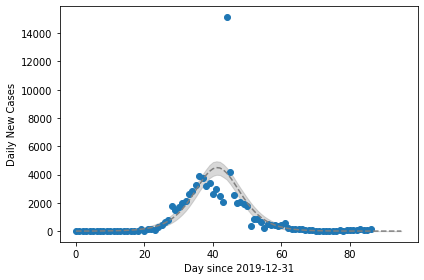

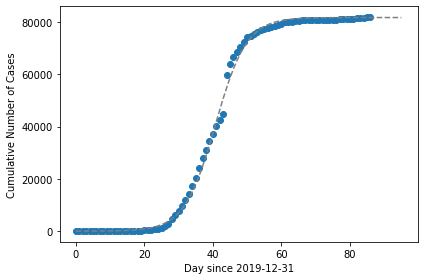

In [107]:
check_country(country="China", model=logistic_dNdt, p0=[4000, 35, 5])

best-fit param 0 = 8.181e+04 +/- 8738
best-fit param 1 = 41.27 +/- 0.8553
best-fit param 2 = 4.548 +/- 0.5989
day 1 from today, expect 0.7728089473121771 new cases and 81968.77280894731 total cases
day 2 from today, expect 0.6202907286011214 new cases and 81969.39309967592 total cases
day 3 from today, expect 0.4978711768529749 new cases and 81969.89097085276 total cases
day 4 from today, expect 0.39961107162938797 new cases and 81970.29058192439 total cases
day 5 from today, expect 0.3207429384020473 new cases and 81970.6113248628 total cases


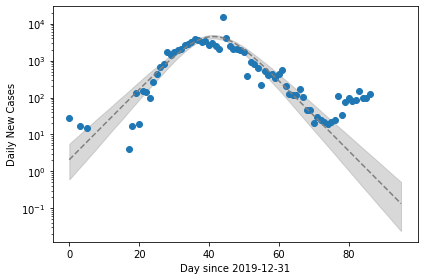

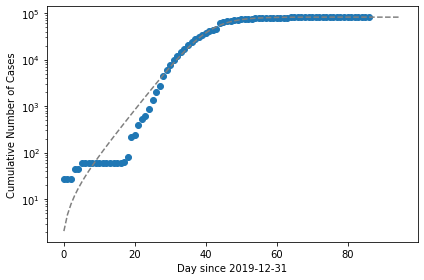

In [108]:
check_country(country="China", model=logistic_dNdt, p0=[4000, 35, 5], ylog=True, out_string="Mar26_semilog")

best-fit param 0 = 8484 +/- 344
best-fit param 1 = 62.4 +/- 0.2325
best-fit param 2 = 3.257 +/- 0.1628
day 1 from today, expect 1.3678450920237348 new cases and 9242.367845092023 total cases
day 2 from today, expect 1.0065299774862595 new cases and 9243.37437506951 total cases
day 3 from today, expect 0.7406015697775024 new cases and 9244.114976639288 total cases
day 4 from today, expect 0.5449028541778413 new cases and 9244.659879493465 total cases
day 5 from today, expect 0.4009002032847248 new cases and 9245.06077969675 total cases


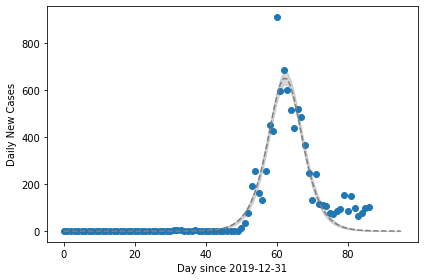

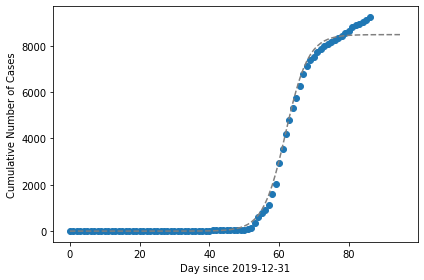

In [109]:
check_country(country="South_Korea", model=logistic_dNdt, p0=[4000, 35, 5])

Blinding the last 10 days
[77. 78. 79. 80. 81. 82. 83. 84. 85. 86.] [ 84  93 152  87 147  98  64  76 100 104]
best-fit param 0 = 8336 +/- 306.4
best-fit param 1 = 62.35 +/- 0.2036
best-fit param 2 = 3.159 +/- 0.1437
day 1 from today, expect 25.027328958820224 new cases and 8261.02732895882 total cases
day 2 from today, expect 18.330840445031157 new cases and 8279.358169403851 total cases
day 3 from today, expect 13.407281059559299 new cases and 8292.76545046341 total cases
day 4 from today, expect 9.796099506475976 new cases and 8302.561549969887 total cases
day 5 from today, expect 7.1522035876383 new cases and 8309.713753557526 total cases


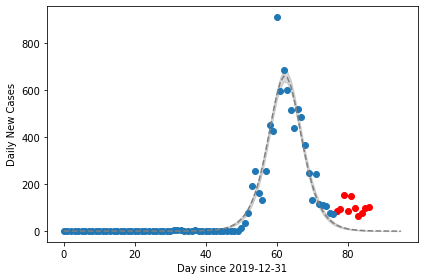

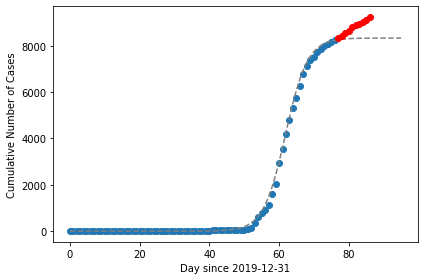

In [110]:
check_country(country="South_Korea", model=logistic_dNdt, p0=[4000, 35, 5], blind=10, out_string="Mar26_blind10days")

best-fit param 0 = 1.088e+05 +/- 8303
best-fit param 1 = 82.88 +/- 0.6339
best-fit param 2 = 4.831 +/- 0.3781
day 1 from today, expect 4721.319127309531 new cases and 79107.31912730953 total cases
day 2 from today, expect 4306.56672112109 new cases and 83413.88584843063 total cases
day 3 from today, expect 3864.436195984467 new cases and 87278.3220444151 total cases
day 4 from today, expect 3417.0851396635394 new cases and 90695.40718407863 total cases
day 5 from today, expect 2982.475788737554 new cases and 93677.8829728162 total cases


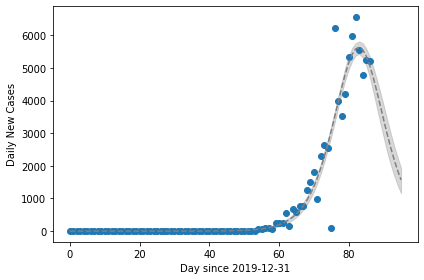

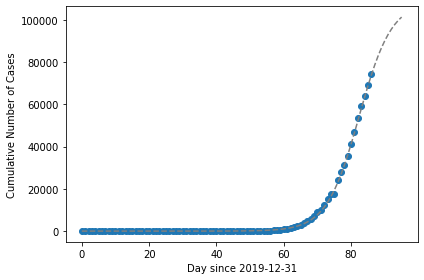

In [111]:
check_country(country="Italy", model=logistic_dNdt, p0=[4000, 35, 5])

Blinding the last 5 days
[82. 83. 84. 85. 86.] [6557 5560 4789 5249 5210]
best-fit param 0 = 1.927e+05 +/- 1.278e+05
best-fit param 1 = 88.11 +/- 6.238
best-fit param 2 = 5.985 +/- 1.101
day 1 from today, expect 6265.350083141656 new cases and 53286.35008314165 total cases
day 2 from today, expect 6740.093827910416 new cases and 60026.44391105207 total cases
day 3 from today, expect 7166.589510041262 new cases and 67193.03342109334 total cases
day 4 from today, expect 7526.01412166438 new cases and 74719.04754275772 total cases
day 5 from today, expect 7801.063119275487 new cases and 82520.1106620332 total cases


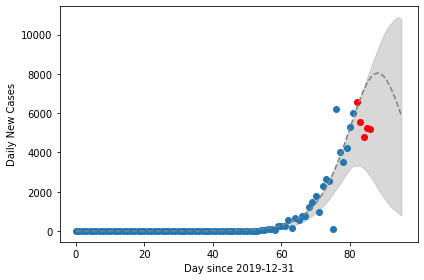

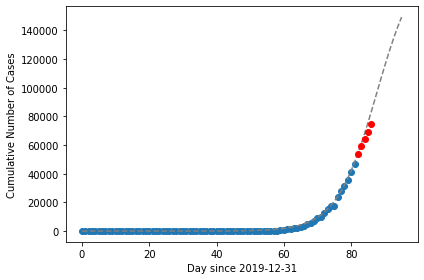

In [112]:
check_country(country="Italy", model=logistic_dNdt, p0=[4000, 35, 5], blind=5, out_string="Mar26_blind5days")

Blinding the last 3 days
[84. 85. 86.] [4789 5249 5210]
best-fit param 0 = 1.377e+05 +/- 3.12e+04
best-fit param 1 = 84.98 +/- 2.144
best-fit param 2 = 5.401 +/- 0.6779
day 1 from today, expect 6318.9937739274 new cases and 65456.9937739274 total cases
day 2 from today, expect 6371.333981953278 new cases and 71828.32775588069 total cases
day 3 from today, expect 6315.104982479381 new cases and 78143.43273836008 total cases
day 4 from today, expect 6154.090130042854 new cases and 84297.52286840293 total cases
day 5 from today, expect 5898.8487833162835 new cases and 90196.37165171921 total cases


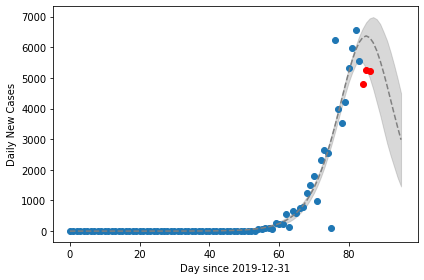

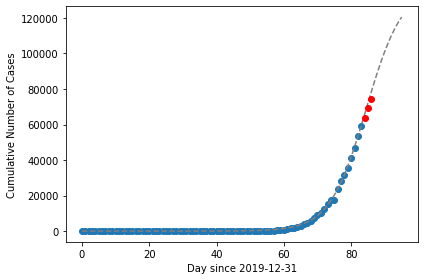

In [113]:
check_country(country="Italy", model=logistic_dNdt, p0=[4000, 35, 5], blind=3, out_string="Mar26_blind3days")

best-fit param 0 = 2.861 +/- 2.85e+06
best-fit param 1 = 46.05 +/- 4.682e+06
best-fit param 2 = 4.7 +/- 0.1862
day 1 from today, expect 17374.0643535464 new cases and 86568.0643535464 total cases
day 2 from today, expect 21492.995477981884 new cases and 108061.05983152828 total cases
day 3 from today, expect 26588.41622871367 new cases and 134649.47606024196 total cases
day 4 from today, expect 32891.82646856004 new cases and 167541.30252880199 total cases
day 5 from today, expect 40689.60855477796 new cases and 208230.91108357994 total cases


/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: covariance is not positive-semidefinite.
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


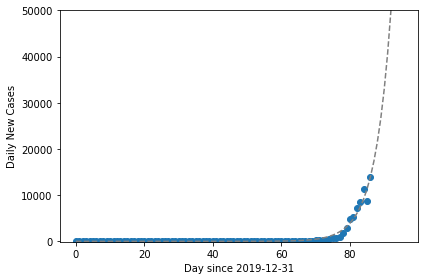

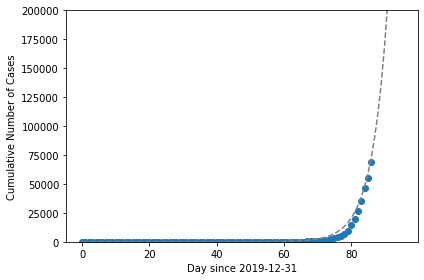

In [128]:
check_country(country="United_States_of_America", model=exp, p0=[400, 50, 5],out_string="Mar26_exp_model", 
                           ylim_new=[-100, 5e4], ylim_cum=[-10, 2e5], )

best-fit param 0 = 1.573e+05 +/- 1.734e+04
best-fit param 1 = 87.16 +/- 0.5807
best-fit param 2 = 2.995 +/- 0.1887
day 1 from today, expect 13116.773652401724 new cases and 82310.77365240172 total cases
day 2 from today, expect 12869.54840783302 new cases and 95180.32206023474 total cases
day 3 from today, expect 11958.311247100517 new cases and 107138.63330733526 total cases
day 4 from today, expect 10563.280109280542 new cases and 117701.9134166158 total cases
day 5 from today, expect 8922.478917262972 new cases and 126624.39233387877 total cases


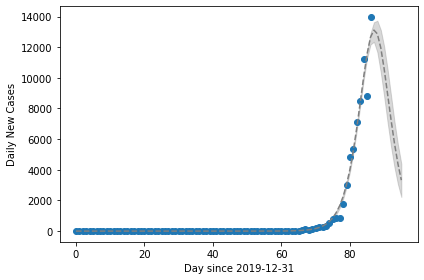

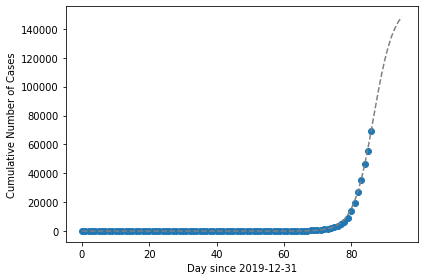

In [116]:
check_country(country="United_States_of_America", model=logistic_dNdt, p0=[4000, 35, 5], out_string="Mar26_logistic_model")

Blinding the last 3 days
[84. 85. 86.] [11236  8789 13963]
best-fit param 0 = 7.909e+04 +/- 4643
best-fit param 1 = 84.09 +/- 0.2279
best-fit param 2 = 2.216 +/- 0.07082
day 1 from today, expect 8917.260383752284 new cases and 44123.260383752284 total cases
day 2 from today, expect 8556.009245739928 new cases and 52679.26962949221 total cases
day 3 from today, expect 7451.286816738208 new cases and 60130.55644623042 total cases
day 4 from today, expect 5962.542646686949 new cases and 66093.09909291737 total cases
day 5 from today, expect 4457.517799085641 new cases and 70550.61689200302 total cases


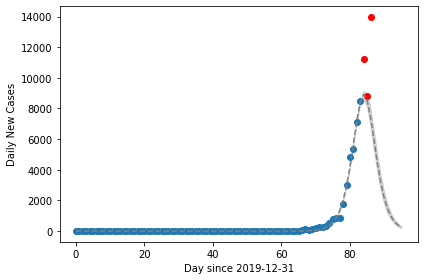

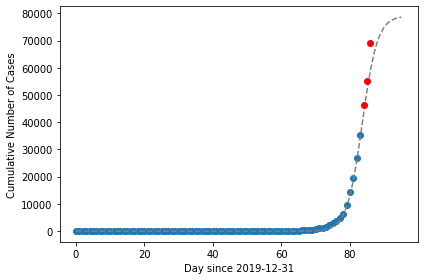

In [117]:
check_country(country="United_States_of_America", model=logistic_dNdt, p0=[20000, 90, 10], blind=3, out_string="Mar26_logistic_blind3days")

Blinding the last 5 days
[82. 83. 84. 85. 86.] [ 7123  8459 11236  8789 13963]
best-fit param 0 = 1352 +/- 1.077e+09
best-fit param 1 = 76.91 +/- 2.245e+06
best-fit param 2 = 2.817 +/- 0.08645


/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: covariance is not positive-semidefinite.
/home/qifeng/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in sqrt


day 1 from today, expect 8248.883870380265 new cases and 27872.883870380265 total cases
day 2 from today, expect 11763.779764559195 new cases and 39636.66363493946 total cases
day 3 from today, expect 16776.392603363547 new cases and 56413.056238303005 total cases
day 4 from today, expect 23924.90801554354 new cases and 80337.96425384654 total cases
day 5 from today, expect 34119.44612201417 new cases and 114457.41037586071 total cases


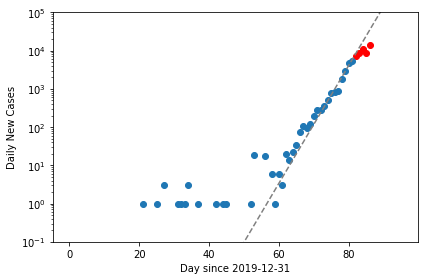

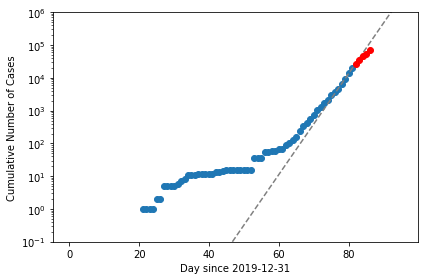

In [124]:
check_country(country="United_States_of_America", 
              model=exp, p0=[1000, 78, 6],
              #model=logistic_dNdt, p0=[3000, 80, 5], 
              blind=5, out_string="Mar26_exp_model_blind5days_semilog", ylog=True, 
              ylim_new=[1e-1, 1e5], ylim_cum=[1e-1, 1e6], )

Blinding the last 3 days
[84. 85. 86.] [11236  8789 13963]
best-fit param 0 = 7.909e+04 +/- 4643
best-fit param 1 = 84.09 +/- 0.2279
best-fit param 2 = 2.216 +/- 0.07082
day 1 from today, expect 8917.260383752284 new cases and 44123.260383752284 total cases
day 2 from today, expect 8556.009245739928 new cases and 52679.26962949221 total cases
day 3 from today, expect 7451.286816738208 new cases and 60130.55644623042 total cases
day 4 from today, expect 5962.542646686949 new cases and 66093.09909291737 total cases
day 5 from today, expect 4457.517799085641 new cases and 70550.61689200302 total cases


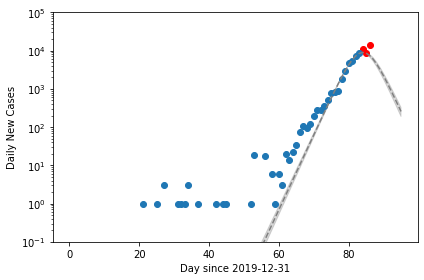

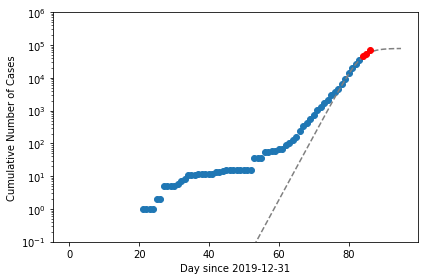

In [126]:
check_country(country="United_States_of_America", model=logistic_dNdt, p0=[20000, 90, 10], 
              blind=3, out_string="Mar26_logistic_blind3days_semilog", ylog=True, 
              ylim_new=[1e-1, 1e5], ylim_cum=[1e-1, 1e6], )

In [81]:
import geopandas as gpd
